# Making the Most of your Colab Subscription



## Faster GPUs

With Colab Pro you have priority access to our fastest GPUs and with Pro+ even more so. For example, you may get a T4 or P100 GPU at times when most users of standard Colab receive a slower K80 GPU. You can see what GPU you've been assigned at any time by executing the following cell.

If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to Runtime > Change runtime type in the menu to enable a GPU accelerator, and then re-execute the code cell.

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In order to use a GPU with your notebook, select the Runtime > Change runtime type menu, and then set the hardware accelerator dropdown to GPU.

## More memory

With Colab Pro you have the option to access high-memory VMs when they are available, and with Pro+ even more so. To set your notebook preference to use a high-memory runtime, select the Runtime > 'Change runtime type' menu, and then select High-RAM in the Runtime shape dropdown.

You can see how much memory you have available at any time by running the following code cell.



If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via Runtime > Change runtime type in the menu. Then select High-RAM in the Runtime shape dropdown. After, re-execute the code cell.


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 37.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import collections

import helper
import numpy as np
#import project_tests as tests
import pandas as pd

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import GRU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional
from keras.layers.embeddings import Embedding
from tensorflow.keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
from keras.losses import categorical_crossentropy
!cp "/content/drive/My Drive/eng_dataset.txt" .
file_en = open('eng_dataset.txt','r')
en_iter = iter(file_en)

data=[]
count = 0
for line in en_iter:
  if count < 6000:
    data.append(line)
    count=count+1
  else:
    break
  



print('Dataset Loaded')



# Preprocess data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
vocab = tokenizer.word_index
seqs = tokenizer.texts_to_sequences(data)


Dataset Loaded


In [17]:
print(len(vocab))

9301


In [ ]:
def prepare_sentence(seq, maxlen):
    # Pads seq and slides windows
    x = []
    y = []
    for i, w in enumerate(seq):
        x_padded = pad_sequences([seq[:i]],
                                 maxlen=maxlen - 1,
                                 padding='pre')[0]  # Pads before each sequence
       
        #x=x_padded
        x.append(x_padded)
        y.append(w)
        
    return x, y

# Pad sequences and slide windows
maxlen = max([len(seq) for seq in seqs])
x = []
y = []
for seq in seqs:
    x_windows, y_windows = prepare_sentence(seq, maxlen)
    x += x_windows 
    y += y_windows
x = np.array(x)
y = np.array(y) - 1  # The word <PAD> does not constitute a class
#a=len(y)
#b=len(vocab)
#y = np.zeros((364226, 100), int)
#y = np.zeros((a, b), int)
#np.fill_diagonal(y, 1)
#y = np.eye(len(vocab))[y]  # One hot encoding


In [ ]:
y = np.eye(len(vocab))[y]

Text(0, 0.5, 'Loss')

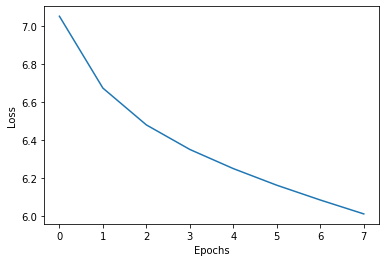

In [ ]:
xc= range(8)
plt.figure()
plt.plot(xc, train_loss)

plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
from keras.callbacks import History 
from keras import callbacks
import matplotlib.pyplot as plt
# Define model
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(vocab) + 1,  # vocabulary size. Adding an
                                            # extra element for <PAD> word
                output_dim=6,  # size of embeddings
                input_length=maxlen - 1))  # length of the padded sequences
    model.add(LSTM(12))
    model.add(Dropout(0.3))
    model.add(Dense(len(vocab), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(vocab), activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model

# Train network
#model.fit(x, y, batch_size = 100,epochs=10,validation_split = 0.01)
model_ckpt= create_model()
checkpoint_path = "./train_ckpt/cp.ckpt"
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_best_only=True, save_weights_only=True, verbose=1)
cp_callback = callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=2)
model_ckpt.fit(x, y, batch_size = 100,epochs=10,validation_split = 0.01,callbacks=[cp_callback])
train_loss = model_ckpt.history.history['loss']
val_loss   = model_ckpt.history.history['val_loss']

xc= range(10)
plt.figure()
plt.plo19(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")

Streaming output truncated to the last 5000 lines.
1149/1615 [====================>.........] - ETA: 33:23 - loss: 6.3711 - accuracy: 0.1043
Epoch 3: saving model to ./train_ckpt/cp.ckpt
1151/1615 [====================>.........] - ETA: 33:15 - loss: 6.3710 - accuracy: 0.1043
Epoch 3: saving model to ./train_ckpt/cp.ckpt
1153/1615 [====================>.........] - ETA: 33:06 - loss: 6.3712 - accuracy: 0.1042
Epoch 3: saving model to ./train_ckpt/cp.ckpt
1155/1615 [====================>.........] - ETA: 32:57 - loss: 6.3709 - accuracy: 0.1043
Epoch 3: saving model to ./train_ckpt/cp.ckpt
1157/1615 [====================>.........] - ETA: 32:48 - loss: 6.3711 - accuracy: 0.1042
Epoch 3: saving model to ./train_ckpt/cp.ckpt
1159/1615 [====================>.........] - ETA: 32:40 - loss: 6.3706 - accuracy: 0.1043
Epoch 3: saving model to ./train_ckpt/cp.ckpt
1161/1615 [====================>.........] - ETA: 32:31 - loss: 6.3708 - accuracy: 0.1043
Epoch 3: saving model to ./train_ckpt/cp.ck

KeyboardInterrupt: ignored

In [ ]:
checkpoint_path = "./train_ckpt/cp.ckpt"
model_ckpt2 = create_model()
model_ckpt2.load_weights(checkpoint_path)



In [ ]:
file_en = open('eng_dataset.txt','r')
en_iter = iter(file_en)
data_test=[]
count = 0
for line in en_iter:
  
    if count >=0 and count <10000:
      data_test.append(line)
      count=count+1
print(len(data_test))



10000


In [ ]:
#data1.append("I don't have all the answers, but you can make a difference in a child's life by sending a gift to The Salvation Army")
file_ouput = open('./output_eng.txt','w')
for sentence in data_test:
    tok = tokenizer.texts_to_sequences([sentence])[0]
    
    x_test, y_test = prepare_sentence(tok, maxlen)
    x_test = np.array(x_test)
    y_test = np.array(y_test) - 1  # The word <PAD> does not constitute a class
    p_pred = model.predict(x_test)  # array of conditional probabilities
    #print(p_pred)
    vocab_inv = {v: k for k, v in vocab.items()}

    # Compute product
    # Efficient version: np.exp(np.sum(np.log(np.diag(p_pred[:, y_test]))))
    log_p_sentence = 0
    for i, prob in enumerate(p_pred):
        word = vocab_inv[y_test[i]+1]  # Index 0 from vocab is reserved to <PAD>
        history = ' '.join([vocab_inv[w] for w in x_test[i, :] if w != 0])
        prob_word = prob[y_test[i]]
        log_p_sentence += np.log(prob_word)
        #print('P(w={}|h={})={}'.format(word, history, prob_word))
    #print('Prob. sentence: {}'.format(np.exp(log_p_sentence)))
    final_p=np.exp(log_p_sentence)
    perp = 1 / final_p
    
    perp=perp**(float(1/len(tok)))
    file_ouput.write(str(perp))
    file_ouput.write("\n")
    

In [ ]:
file_en = open('eng_dataset.txt','r')
en_iter = iter(file_en)
data_test=[]
count = 0
for line in en_iter:
  print(line)


Streaming output truncated to the last 5000 lines.

Perkins does say he's sorry by offering apologies and solicitating future comments.

Perkins does apologize: "Please accept our sincerest apologies, as we hope you keep giving us thoughts as our site grows."

Perkins offered his sincerest apologies and his hope that you will continue to offer comments. 

Sometimes committee chairmen do modify hearing transcripts but that is not so in this case because it was checked with a videotape.

Committee chairmen do sometimes modify hearing transcripts, but not this time: I checked the transcript against a videotape.

Committee chairmen and witnesses do modify transcripts, but not in this case: The hearing transcript was checked against a videotape.

Jonathan Rauch replies: Committee chairmen sometimes modify hearing transcripts, but not here: I checked the transcript against a videotape.

There are national quotas to ensure that no country can take up more than 7 percent of the annual green-ca

In [3]:
!cp "/content/drive/My Drive/NLP_PROJECT.xlsx" .

In [4]:
import pandas as pd
df = pd.read_excel('NLP_PROJECT.xlsx')

In [12]:
print(df.columns)
man_hf = df["Manual HF Score"].values.tolist()
print(man_hf)
fluency_score1 = df["Normalized Fluency Score"].values.tolist()
print(fluency_score1)
fluency_score2 = df["Normalized Fluency Score1"].values.tolist()
print(fluency_score2)
fluency_score3 = df["Normalized Fluency Score2"].values.tolist()
print(fluency_score3)


Index(['text', 'readbility_index1_score', 'Normalized readbility_index1_score',
       'readbility_index2_score', 'Normalized readbility_index2_score',
       'readbility_index3_score', 'Normalized readbility_index3_score',
       'readbility_index4_score', 'Normalized readbility_index4_score',
       'readbility_index5_score', 'Normalized readbility_index5_score',
       'LSTM PERPLIXITY SCORES', 'Normalized LSTM PERPLIXITY SCORES',
       'Statistical_model LM score', 'Normalized Statistical_model LM score',
       'Normalized Fluency Score', 'Manual HF Score',
       'Normalized Fluency Score1', 'Normalized Fluency Score2'],
      dtype='object')
[2.0, 4.5, 5.0, 4.0, 3.0, 1.5, 3.0, 3.5, 3.5, 4.5, 3.0, 3.0, 4.5, 2.0, 4.5, 1.5, 4.5, 2.5, 3.5, 3.0, 4.0, 2.0, 3.0, 3.5, 4.5, 3.5, 4.0, 2.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.5, 4.0, 3.0, 1.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 2.0, 3.0, 1

In [14]:
from scipy.stats import pearsonr
corr, _ = pearsonr(man_hf, fluency_score1)
print('Pearsons correlation: %.3f' % corr)
corr, _ = pearsonr(man_hf, fluency_score2)
print('Pearsons correlation: %.3f' % corr)
corr, _ = pearsonr(man_hf, fluency_score3)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.519
Pearsons correlation: 0.429
Pearsons correlation: 0.496


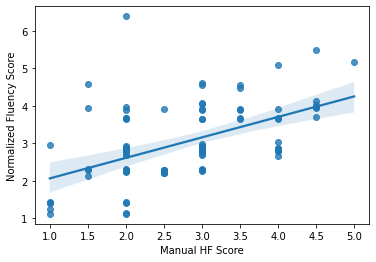

In [15]:
import seaborn as sns

sns.regplot(x=df["Manual HF Score"], y=df["Normalized Fluency Score"])

## Longer runtimes

All Colab runtimes are reset after some period of time (which is faster if the runtime isn't executing code). While Colab Pro subscribers still have limits, these will be roughly twice the limits for non-subscribers, with even more stability for Pro+.

## Resource limits in Colab Pro

Your resources are not unlimited in Colab. To make the most of Colab Pro and Pro+, please avoid using resources when you don't need them. For example, only use a GPU or high-RAM runtime when required, and close Colab tabs when finished.


## Send us feedback!

If you have any feedback for us, please let us know. The best way to send feedback is by using the Help > 'Send feedback...' menu. If you encounter usage limits in Colab Pro consider subscribing to Pro+. If you are interested in unlimited pay as you go usage to remove all imposed limits, please do let us know.

If you encounter errors or other issues with billing (payments) for Colab Pro or Pro+, please email [colab-billing@google.com](mailto:colab-billing@google.com).

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out these  tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
